In [ ]:
pip install boto3 pillow matplotlib

Loading Loose images...
Loading Tight images...


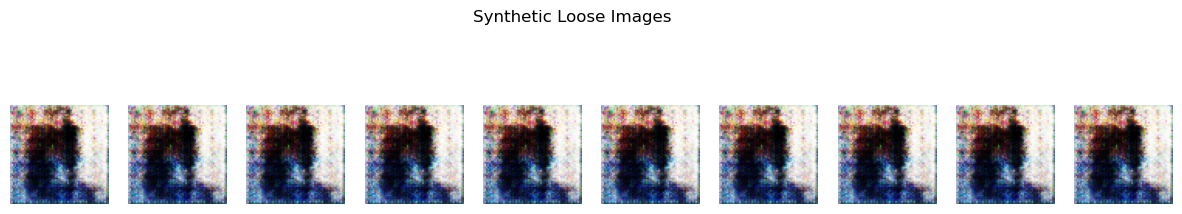

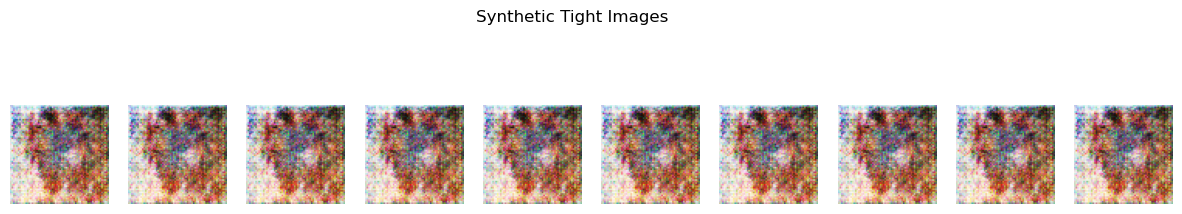

In [4]:
import boto3                     # AWS S3 access
import matplotlib.pyplot as plt  # Image display
from PIL import Image            # Image handling
import io                        # Byte stream


# =========================
# S3 CONFIG
# =========================

BUCKET_NAME = "ai-bmi-predictor"

LOOSE_PREFIX = "tight and loose classifier/synthetic data/Training Data/Loose/"
TIGHT_PREFIX = "tight and loose classifier/synthetic data/Training Data/Tight/"

s3 = boto3.client("s3")


# =========================
# FUNCTION TO LOAD IMAGES
# =========================

def load_images_from_s3(prefix, num_images=10):
    images = []

    response = s3.list_objects_v2(
        Bucket=BUCKET_NAME,
        Prefix=prefix
    )

    # Take first N images
    for obj in response.get("Contents", [])[:num_images]:
        img_obj = s3.get_object(
            Bucket=BUCKET_NAME,
            Key=obj["Key"]
        )
        img = Image.open(io.BytesIO(img_obj["Body"].read())).convert("RGB")
        images.append(img)

    return images


# =========================
# LOAD IMAGES
# =========================

print("Loading Loose images...")
loose_images = load_images_from_s3(LOOSE_PREFIX, 10)

print("Loading Tight images...")
tight_images = load_images_from_s3(TIGHT_PREFIX, 10)


# =========================
# DISPLAY IMAGES
# =========================

def show_images(images, title):
    plt.figure(figsize=(15, 3))
    for i, img in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()


show_images(loose_images, "Synthetic Loose Images")
show_images(tight_images, "Synthetic Tight Images")


In [ ]:
import boto3

s3 = boto3.resource("s3")
bucket = s3.Bucket("ai-bmi-predictor")

prefix = "tight and loose classifier/synthetic data/"

bucket.objects.filter(Prefix=prefix).delete()
